# A/B Test Analysis

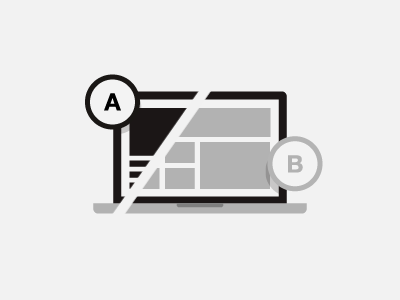

### Examining two marketing strategies implemented in an advertising campaign by utilizing Python and its libraries, particularly Pandas and Plotly

#### Importing Libraries and data files

In [2]:
import pandas as pd
import datetime
from datetime import date,timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"

control_data = pd.read_csv("control_group.csv", sep=";")
test_data = pd.read_csv("test_group.csv",sep=";")

In [3]:
control_data.head()
control_data.dtypes



Campaign Name           object
Date                    object
Spend [USD]              int64
# of Impressions       float64
Reach                  float64
# of Website Clicks    float64
# of Searches          float64
# of View Content      float64
# of Add to Cart       float64
# of Purchase          float64
dtype: object

In [5]:
control_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received", "Content Viewed", "Added to Cart","Purchases"]

test_data.columns = ["Campaign Name", "Date", "Amount Spent", "Number of Impressions", "Reach", "Website Clicks", "Searches Received", "Content Viewed", "Added to Cart","Purchases"]

#### Cleaning and Preparing Data for Analysis

In [6]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    1
Reach                    1
Website Clicks           1
Searches Received        1
Content Viewed           1
Added to Cart            1
Purchases                1
dtype: int64

In [7]:
test_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [8]:
control_data["Number of Impressions"].fillna(value=control_data["Number of Impressions"].mean(),inplace=True)
control_data["Reach"].fillna(value=control_data["Reach"].mean(),inplace=True)
control_data["Website Clicks"].fillna(value=control_data["Website Clicks"].mean(),inplace=True)
control_data["Searches Received"].fillna(value=control_data["Searches Received"].mean(),inplace=True)
control_data["Content Viewed"].fillna(value=control_data["Content Viewed"].mean(),inplace=True)
control_data["Added to Cart"].fillna(value=control_data["Added to Cart"].mean(),inplace=True)
control_data["Purchases"].fillna(value=control_data["Purchases"].mean(),inplace=True)

In [9]:
control_data.isnull().sum()

Campaign Name            0
Date                     0
Amount Spent             0
Number of Impressions    0
Reach                    0
Website Clicks           0
Searches Received        0
Content Viewed           0
Added to Cart            0
Purchases                0
dtype: int64

In [75]:
ab_data.head()

,Campaign Name,Date,Amount Spent,Number of Impressions,Reach,Website Clicks,Searches Received,Content Viewed,Added to Cart,Purchases
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Test Campaign,1.08.2019,3008,39550.0,35820.0,3038.0,1946.0,1069.0,894.0,255.0
2,Test Campaign,10.08.2019,2790,95054.0,79632.0,8125.0,2312.0,1804.0,424.0,275.0
3,Control Campaign,10.08.2019,2149,117624.0,91257.0,2277.0,2475.0,1984.0,1629.0,734.0
4,Test Campaign,11.08.2019,2420,83633.0,71286.0,3750.0,2893.0,2617.0,1075.0,668.0


In [12]:
ab_data["Campaign Name"].value_counts()

Control Campaign    30
Test Campaign       30
Name: Campaign Name, dtype: int64

## Starting Analysis

In [82]:
figure = px.scatter(data_frame = ab_data, 
                    x="Number of Impressions",
                    y="Amount Spent", 
                    size="Amount Spent", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

## Impressions: 
The Control campaign resulted in more impressions compared to the Test campaign, considering the amount spent on both campaigns.

In [85]:
fig = px.histogram(df, x="Campaign Name", y="Searches Received",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

##  Website Searches: 
The Test campaign generated more searches on the website, with 72.5k searches compared to 66.6k for the Control campaign.

In [83]:
fig = px.histogram(df, x="Campaign Name", y="Website Clicks",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

## Website Clicks: 
Despite the Control campaign having fewer website clicks, it resulted in more products being added to the cart compared to the Test campaign. The Control campaign had 39k products added to the cart, while the Test campaign had 26.4k.

In [86]:
df = ab_data

fig = px.histogram(df, x="Campaign Name", y="Added to Cart",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

## Added to Cart: 
Despite the Control campaign having fewer website clicks, it resulted in more products being added to the cart compared to the Test campaign. The Control campaign had 39k products added to the cart, while the Test campaign had 26.4k.

In [87]:
fig = px.histogram(df, x="Campaign Name", y="Content Viewed",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

## Website Engagement: 
The Control campaign had higher engagement on the website compared to the Test campaign, despite the Control campaign having lower website clicks. The Control campaign had 58.3k engagements on the website, while the Test campaign had 55.7k.

In [88]:
fig = px.histogram(df, x="Campaign Name", y="Amount Spent",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

## Amount Spent: 
The Test campaign had a higher amount spent compared to the Control campaign, but the Control campaign resulted in more content views and more products in the cart. This suggests that the Control campaign was more efficient in terms of generating engagement and conversions.

In [89]:
fig = px.histogram(df, x="Campaign Name", y="Purchases",
             color='Campaign Name',
             height=400,text_auto=True)
fig.show()

## Sales: 
Although there is only a 1% difference in purchases made, the Control campaign resulted in more sales with less marketing spending compared to the Test campaign. The Control campaign generated 15.68k sales, while the Test campaign generated 15.63k.

<br/>

# Conversion Trend

In [90]:
figure = px.scatter(data_frame = ab_data, 
                    x="Content Viewed",
                    y="Website Clicks", 
                    size="Website Clicks", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

## Website Click Engagement:
The Control campaign had higher engagement from website clicks compared to the Test campaign.

In [91]:
figure = px.scatter(data_frame = ab_data, 
                    x="Added to Cart",
                    y="Content Viewed", 
                    size="Added to Cart", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

## Cart Conversion:
The Control campaign led to more products being added to the cart per content viewed compared to the Test campaign.

In [92]:
figure = px.scatter(data_frame = ab_data, 
                    x="Purchases",
                    y="Added to Cart", 
                    size="Purchases", 
                    color= "Campaign Name", 
                    trendline="ols")
figure.show()

## Conversion Rate:
Although the Control campaign had more sales and more products in the cart, the Test campaign had a higher conversion rate. This indicates that the Test campaign was more effective in converting website visitors into customers.

<br/>

# Based on these conclusions, the following suggestions can be made:

 1. Consider allocating more budget to the Control campaign, as it showed better efficiency in terms of generating engagement, product views, and sales.
<br/>
 2. Analyze the reasons behind the higher conversion rate of the Test campaign and identify strategies or elements that contributed to this success. Apply those strategies to the Control campaign to further improve its conversion rate.
<br/>
 3. Investigate the factors that led to higher website searches in the Test campaign and leverage those factors to increase search activity in future marketing efforts.
<br/>
 4. Explore ways to improve the website click-through rate for the Control campaign to match or surpass the engagement level of the Test campaign.
<br/>
 5. Continuously monitor and analyze the performance of both campaigns to identify any further insights or patterns that can inform future marketing decisions and optimizations.

## The test campaign can be used to market a specific product to a specific audience and the control campaign can be used can be used to market multiple products to a wider audience